23/11/15 19:40:49 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


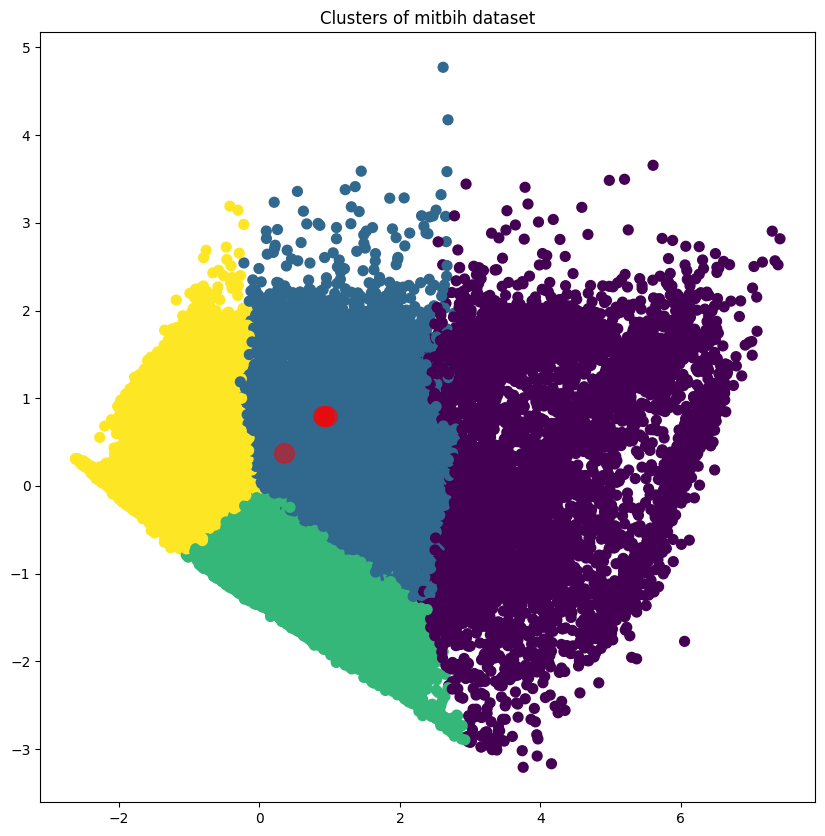

In [25]:
# Import numpy and SystemDS
import numpy as np
from systemds.context import SystemDSContext
from systemds.operator.algorithm import kmeans,kmeansPredict
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# compute the weights
with SystemDSContext() as sds:
    
    data=pd.read_csv('Dataset/mitbih_train.csv')

    X = data.iloc[:, :-1].values
    X_Matrix = sds.from_numpy(X)

    [centroids,labels] = kmeans(X_Matrix,k=4).compute()
    # print(centroids)
    
# create a graph of clusters
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
plt.figure(figsize=(10,10))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.title('Clusters of mitbih dataset')
plt.show()